In [47]:
# univariate lstm example
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten


In [48]:
df=pd.read_excel(r"C:\Users\ASUS\Documents\Data.xlsx")

In [49]:
df['Year']=pd.to_datetime(df['Year'])

In [50]:
df

,Year,GDP
0,2000-03-31,2.916673e+05
1,2001-03-31,2.969075e+05
2,2002-03-31,3.215102e+05
3,2003-03-31,3.524515e+05
4,2004-03-31,4.008466e+05
5,2005-03-31,4.546264e+05
6,2006-03-31,5.326289e+05
7,2007-03-31,6.395692e+05
8,2008-03-31,7.493402e+05
9,2009-03-31,8.250077e+05


In [51]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [52]:
# define input sequence
timeseries_data = df['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [53]:
X,y

(array([[ 291667.3016319 ,  296907.5049611 ,  321510.24317414],
        [ 296907.5049611 ,  321510.24317414,  352451.54656777],
        [ 321510.24317414,  352451.54656777,  400846.5856956 ],
        [ 352451.54656777,  400846.5856956 ,  454626.39652421],
        [ 400846.5856956 ,  454626.39652421,  532628.94129803],
        [ 454626.39652421,  532628.94129803,  639569.21997596],
        [ 532628.94129803,  639569.21997596,  749340.24499019],
        [ 639569.21997596,  749340.24499019,  825007.72494696],
        [ 749340.24499019,  825007.72494696,  936379.59336669],
        [ 825007.72494696,  936379.59336669, 1148000.58706407],
        [ 936379.59336669, 1148000.58706407, 1280369.43710241],
        [1148000.58706407, 1280369.43710241, 1459628.62522419],
        [1280369.43710241, 1459628.62522419, 1649646.63569529],
        [1459628.62522419, 1649646.63569529, 1779137.93025266],
        [1649646.63569529, 1779137.93025266, 1966224.58210802],
        [1779137.93025266, 1966224.58210

In [54]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

## Building LSTM Model

In [55]:
X.shape

(21, 3, 1)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [20]:
175415.25+3861195.2

4036610.45

In [ ]:
 ₹40,55,847 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history2 = model2.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 801ms/step - loss: 99.3173 - val_loss: 99.3563 - learning_rate: 0.0010
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 99.2585 - val_loss: 99.1682 - learning_rate: 0.0010
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 99.1558 - val_loss: 98.9865 - learning_rate: 0.0010
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 98.9598 - val_loss: 98.8101 - learning_rate: 0.0010
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 98.8075 - val_loss: 98.6461 - learning_rate: 0.0010
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 98.6396 - val_loss: 98.4651 - learning_rate: 0.0010
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 98.4643 - val_loss: 98.2791 - learning_rate: 0.0010
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 98.2776 - val_loss: 98.0940 - learning_rate: 0.0010
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 98.0907 - val_loss: 97.9035 - learning_rate: 0.0010

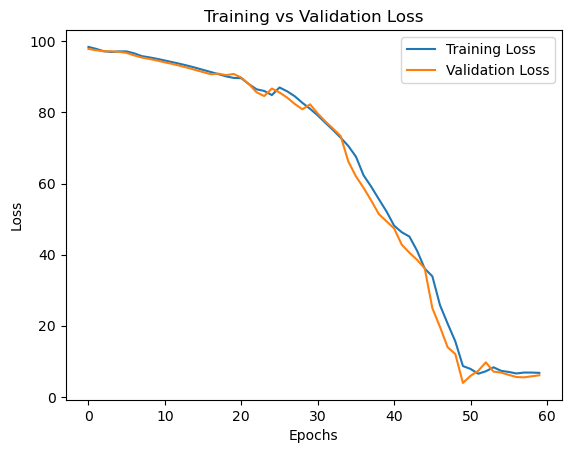

In [36]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [37]:

# Get predictions
y_pred = model2.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
MAPE: 8.15%
MAE: 114362.48
RMSE: 170430.65


In [38]:
# demonstrate prediction for next 1year
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<3):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3890067.5]
1 GDP input [3144138.01684526 3645883.84790797 3890067.5       ]
1 GDP output [[4550158.5]]
2 GDP input [3645883.84790797 3890067.5        4550158.5       ]
2 GDP output [[5107977.5]]
[3890067.5, 4550158.5, 5107977.5]


In [59]:
data=pd.read_excel(r"C:\Users\ASUS\MSc Applied Statistics SPU\Neural Network\LSTM\model1.xlsx")

In [60]:
data.tail()

,Year,GDP
20,2020-03-31,2.656806e+06
21,2021-03-31,2.610651e+06
22,2022-03-31,3.144138e+06
23,2023-03-31,3.645884e+06
24,2024-03-31,3.957840e+06


In [61]:
data['Year']=pd.to_datetime(data['Year'])

In [62]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [63]:
# define input sequence
timeseries_data = data['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [64]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [65]:
X.shape

(22, 3, 1)

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [69]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model3 = Sequential()
model3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history3 = model3.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - loss: 100.2078 - val_loss: 99.8318 - learning_rate: 0.0010
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 99.7597 - val_loss: 100.2906 - learning_rate: 0.0010
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 100.2690 - val_loss: 99.9042 - learning_rate: 0.0010
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 100.1166 - val_loss: 99.1811 - learning_rate: 0.0010
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 99.2370 - val_loss: 98.7577 - learning_rate: 0.0010
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 98.7195 - val_loss: 98.2041 - learning_rate: 0.0010
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 98.1964 - val_loss: 98.0624 - learning_rate: 0.0010
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 97.9209 - val_loss: 97.0813 - learning_rate: 0.0010
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 97.1163 - val_loss: 96.4930 - learning_rate: 0.0

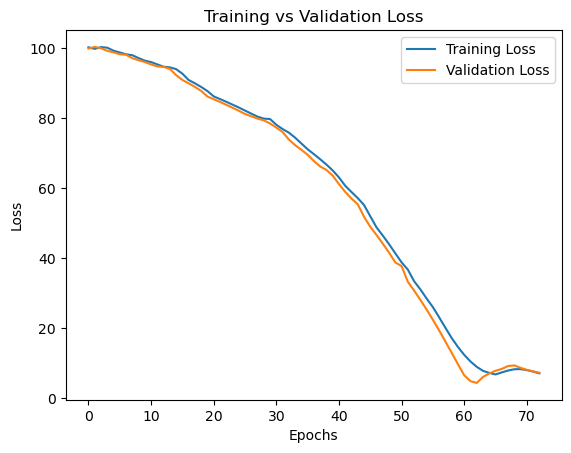

In [70]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [71]:

# Get predictions
y_pred = model3.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
MAPE: 7.28%
MAE: 81592.03
RMSE: 103634.15


In [ ]:
MAPE: 6.52%
MAE: 78687.68
RMSE: 90960.33

In [72]:
# demonstrate prediction for next 1year
x_input = np.array(data['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<1):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[4603650.]
[4603650.0]


In [50]:
new_data = pd.DataFrame({"Year": ["2025-03-31"], "GDP": [4407256.0]})
new_data["Year"] = pd.to_datetime(new_data["Year"])  # Ensure correct date format

# Concatenate the new row to the original dataset
data = pd.concat([data, new_data], ignore_index=True)

# Display updated dataset
print(data.tail()) 

         Year           GDP
21 2021-03-31  2.610651e+06
22 2022-03-31  3.144138e+06
23 2023-03-31  3.645884e+06
24 2024-03-31  3.957840e+06
25 2025-03-31  4.407256e+06


In [52]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [53]:
# define input sequence
timeseries_data = data['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [54]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model4 = Sequential()
model4.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history4 = model4.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 100.1519 - val_loss: 100.4730 - learning_rate: 0.0010
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 99.8274 - val_loss: 100.2702 - learning_rate: 0.0010
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 100.2759 - val_loss: 99.2302 - learning_rate: 0.0010
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 99.7435 - val_loss: 98.7958 - learning_rate: 0.0010
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 99.1102 - val_loss: 98.3603 - learning_rate: 0.0010
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 98.5655 - val_loss: 97.2744 - learning_rate: 0.0010
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 97.2976 - val_loss: 97.3113 - learning_rate: 0.0010
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 96.9717 - val_loss: 96.6098 - learning_rate: 0.0010
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 96.4249 - val_loss: 95.8726 - learning_rate

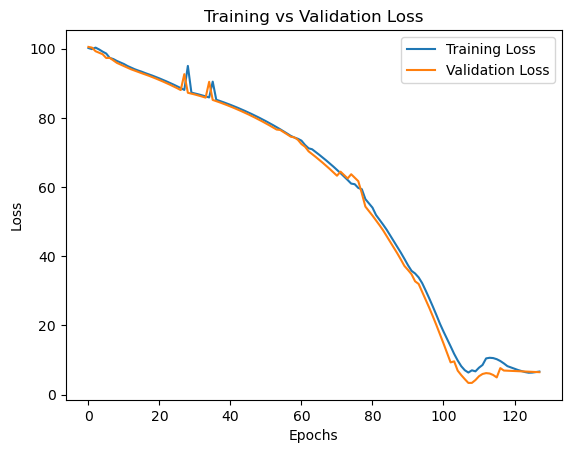

In [57]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [58]:

# Get predictions
y_pred = model4.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
MAPE: 7.51%
MAE: 112602.62
RMSE: 158261.83


In [59]:
# demonstrate prediction for next 1year
x_input = np.array(data['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<1):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[5053009.]
[5053009.0]


In [68]:
new_data = pd.DataFrame({"Year": ["2026-03-31"], "GDP": lst_output})
new_data["Year"] = pd.to_datetime(new_data["Year"])  # Ensure correct date format

# Concatenate the new row to the original dataset
data = pd.concat([data, new_data], ignore_index=True)

# Display updated dataset
print(data.tail()) 

         Year           GDP
22 2022-03-31  3.144138e+06
23 2023-03-31  3.645884e+06
24 2024-03-31  3.957840e+06
25 2025-03-31  4.407256e+06
26 2026-03-31  5.053009e+06


In [66]:
data=data.drop(27)

In [69]:
data

,Year,GDP
0,2000-03-31,2.916673e+05
1,2001-03-31,2.969075e+05
2,2002-03-31,3.215102e+05
3,2003-03-31,3.524515e+05
4,2004-03-31,4.008466e+05
5,2005-03-31,4.546264e+05
6,2006-03-31,5.326289e+05
7,2007-03-31,6.395692e+05
8,2008-03-31,7.493402e+05
9,2009-03-31,8.250077e+05


In [64]:
data.tail(3)

,Year,GDP
24,2024-03-31,3957839.5
25,2025-03-31,4407256.0
27,2026-03-31,5053009.0


In [73]:
import pandas as pd

# Create a dictionary with the data
data = {
    "Year": pd.date_range(start="2000-03-31", periods=27, freq="Y"),
    "GDP": [
        2.916673e+05, 2.969075e+05, 3.215102e+05, 3.524515e+05, 4.008466e+05,
        4.546264e+05, 5.326289e+05, 6.395692e+05, 7.493402e+05, 8.250077e+05,
        9.363796e+05, 1.148001e+06, 1.280369e+06, 1.459629e+06, 1.649647e+06,
        1.779138e+06, 1.966225e+06, 2.198185e+06, 2.352782e+06, 2.528854e+06,
        2.656806e+06, 2.610651e+06, 3.144138e+06, 3.645884e+06, 3.957840e+06,
        4.407256e+06, 5.053009e+06
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_16948\1706251862.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  "Year": pd.date_range(start="2000-03-31", periods=27, freq="Y"),


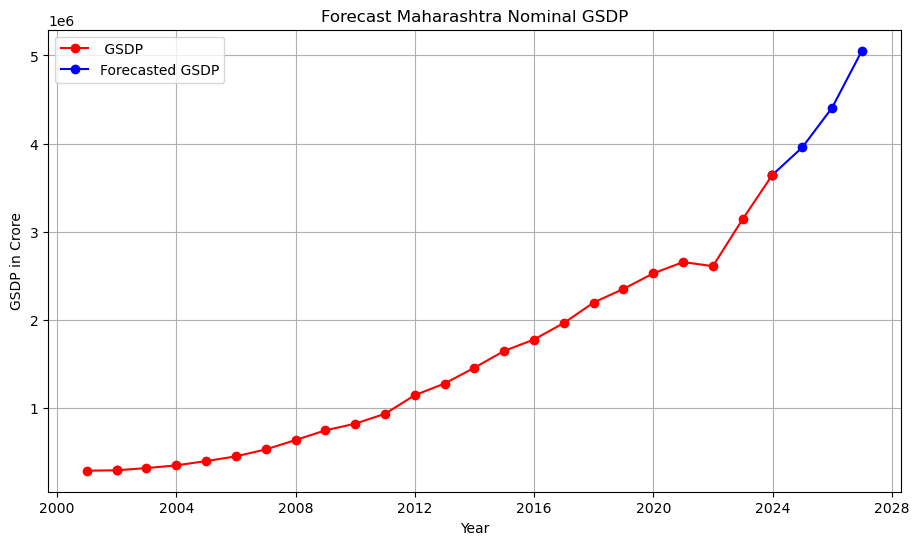

In [74]:
import matplotlib.pyplot as plt

# Sample data (Replace with your actual DataFrame)
years = df["Year"]
gdp = df["GDP"]

plt.figure(figsize=(11, 6))

# Plot historical data (before forecasting)
plt.plot(years[:24], gdp[:24], marker='o', linestyle='-', color='red', label=" GSDP")

# Plot forecasted data with a different color
plt.plot(years[23:], gdp[23:], marker='o', linestyle='-', color='blue', label="Forecasted GSDP")  

# Highlight specific points
plt.scatter([years[1], years[23]], [gdp[1], gdp[23]], color='red', zorder=3)

# Add labels
plt.xlabel("Year")
plt.ylabel("GSDP in Crore")
plt.title("Forecast Maharashtra Nominal GSDP")
plt.xticks(rotation=360)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
